In [1]:
import pickle

#File names
training_name = "D:/data/traffic-signs-data/train.p"
validation_name= "D:/data/traffic-signs-data/valid.p"
testing_name = "D:/data/traffic-signs-data/test.p"

#Load from file to variable
with open(testing_name, mode='rb') as f:
    tst = pickle.load(f)
with open(training_name, mode='rb') as f:
    trn = pickle.load(f)
with open(validation_name, mode='rb') as f:
    vld = pickle.load(f)

#Load features to X and labels to Y
X_tst, Y_tst = tst['features'], tst['labels']
X_trn, Y_trn = trn['features'], trn['labels']
X_vld, Y_vld = vld['features'], vld['labels']

print(X_trn.shape)
print(Y_trn.shape)

train_number = X_trn.shape[0]
validation_number = X_vld.shape[0]
test_number = X_tst.shape[0]
image_dimension = X_trn.shape[1:]
classes_number = len(set(Y_trn))
print("Training set : ", train_number) 
print("Testing set : ", test_number)
print("Validation set : ", validation_number)
print("Image data dimensions : ", image_dimension)
print("Classes : ", classes_number)

(34799, 32, 32, 3)
(34799,)
Training set :  34799
Testing set :  12630
Validation set :  4410
Image data dimensions :  (32, 32, 3)
Classes :  43


In [2]:
id_label = {0: 'Speed limit (20km/h)', 
              1: 'Speed limit (30km/h)', 
              2: 'Speed limit (50km/h)', 
              3: 'Speed limit (60km/h)', 
              4: 'Speed limit (70km/h)', 
              5: 'Speed limit (80km/h)', 
              6: 'End of speed limit (80km/h)', 
              7: 'Speed limit (100km/h)', 
              8: 'Speed limit (120km/h)', 
              9: 'No passing', 
              10: 'No passing for vehicles over 3.5 metric tons', 
              11: 'Right-of-way at the next intersection', 
              12: 'Priority road', 
              13: 'Yield', 
              14: 'Stop', 
              15: 'No vehicles', 
              16: 'Vehicles over 3.5 metric tons prohibited', 
              17: 'No entry', 
              18: 'General caution', 
              19: 'Dangerous curve to the left', 
              20: 'Dangerous curve to the right',
              21: 'Double curve', 
              22: 'Bumpy road',
              23: 'Slippery road',
              24: 'Road narrows on the right', 
              25: 'Road work', 
              26: 'Traffic signals', 
              27: 'Pedestrians', 
              28: 'Children crossing', 
              29: 'Bicycles crossing', 
              30: 'Beware of ice/snow', 
              31: 'Wild animals crossing', 
              32: 'End of all speed and passing limits', 
              33: 'Turn right ahead', 
              34: 'Turn left ahead', 
              35: 'Ahead only', 
              36: 'Go straight or right', 
              37: 'Go straight or left',
              38: 'Keep right', 
              39: 'Keep left', 
              40: 'Roundabout mandatory', 
              41: 'End of no passing',
              42: 'End of no passing by vehicles over 3.5 metric tons'}

[541, 675, 176, 90, 263, 495, 272, 53, 146, 384, 402, 518, 325, 382, 151, 111]


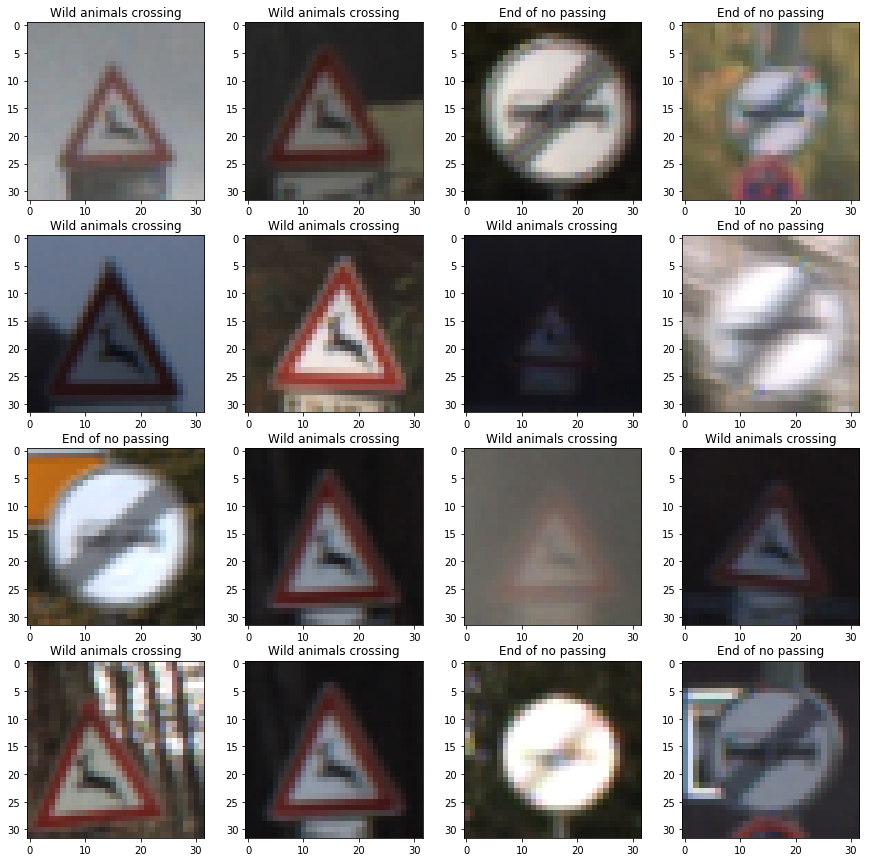

In [3]:
import numpy as np
import random
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt

# Configure maplotlib to show visualizations in the notebook.
%matplotlib inline

block = 4
#Get random indexes from train set list
random_index_list = [random.randint(0, 700) for _ in range(block * block)]
print(random_index_list)
#Prepare and plot images
fig = plt.figure(figsize=(15, 15))
plt.rcParams["axes.grid"] = False

for i, index in enumerate(random_index_list):
    a=fig.add_subplot(block, block, i+1)
    imgplot = plt.imshow(X_trn[index])
    a.set_title('%s' % id_label[Y_trn[index]])
    
plt.show()



In [4]:
import torch
import torch.utils.data
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms.functional as TF
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

In [5]:
print(type(X_tst))

<class 'numpy.ndarray'>


In [6]:
# convert data to a normalized torch.FloatTensor
transform = transforms.Compose([
    #transforms.RandomHorizontalFlip(), # randomly flip and rotate
    #transforms.RandomRotation(30),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

In [8]:
img_tr=transform(Image.fromarray(X_tst[1]))

In [9]:
batch_size=10

In [10]:
train_loader = torch.utils.data.DataLoader(X_trn, batch_size=batch_size)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

In [12]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

ValueError: too many values to unpack (expected 2)

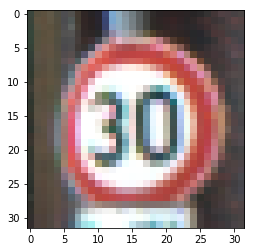

In [13]:
plt.imshow(X_tst[1])
plt.show()

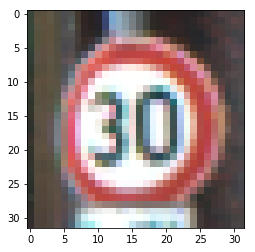

In [14]:
imshow(img_tr)

In [15]:
from scripts.traffic_sign_cnn import TrafficSignDataset

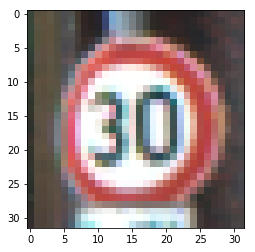

In [21]:
test_data = TrafficSignDataset(X_tst,Y_trn,transform=transform)
imshow(test_data.__getitem__(1)[0])

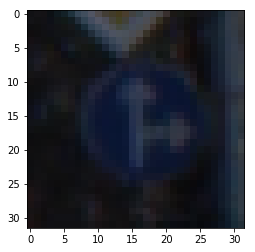

In [23]:
train_data = TrafficSignDataset(X_trn,Y_trn,transform=transform)
imshow(train_data.__getitem__(1000)[0])

tensor([[[-0.4745, -0.5294, -0.5608,  ..., -0.7647, -0.7412, -0.7804],
         [-0.4902, -0.5216, -0.5529,  ..., -0.7176, -0.6863, -0.7725],
         [-0.5137, -0.5216, -0.5373,  ..., -0.6941, -0.6392, -0.7098],
         ...,
         [-0.6078, -0.5765, -0.5608,  ..., -0.5765, -0.5608, -0.6078],
         [-0.5922, -0.5451, -0.5529,  ..., -0.6235, -0.6000, -0.6235],
         [-0.5608, -0.5373, -0.5373,  ..., -0.6157, -0.6235, -0.6314]],

        [[-0.6078, -0.6314, -0.6392,  ..., -0.7647, -0.7490, -0.7882],
         [-0.5922, -0.6235, -0.6392,  ..., -0.7412, -0.7098, -0.7961],
         [-0.6078, -0.6157, -0.6392,  ..., -0.7412, -0.6863, -0.7569],
         ...,
         [-0.6706, -0.6549, -0.6392,  ..., -0.6863, -0.6627, -0.6941],
         [-0.6392, -0.6157, -0.6392,  ..., -0.6941, -0.6784, -0.7098],
         [-0.6078, -0.6078, -0.6157,  ..., -0.6863, -0.7020, -0.7098]],

        [[-0.6941, -0.7098, -0.7020,  ..., -0.8118, -0.8118, -0.8353],
         [-0.6941, -0.7176, -0.7176,  ..., -0

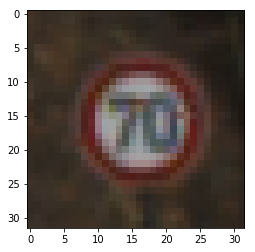

In [18]:
valid_data = TrafficSignDataset(X_vld,Y_vld,transform=transform)
image,label = valid_data.__getitem__(1000)
print(image)
imshow(image)

In [24]:
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20

# prepare data loaders (combine dataset and sampler)
train_idx = list(range(train_number))
train_sampler = SubsetRandomSampler(train_idx)

train_loader = torch.utils.data.DataLoader(train_data, sampler=train_sampler,batch_size=batch_size, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,  num_workers=num_workers)

25


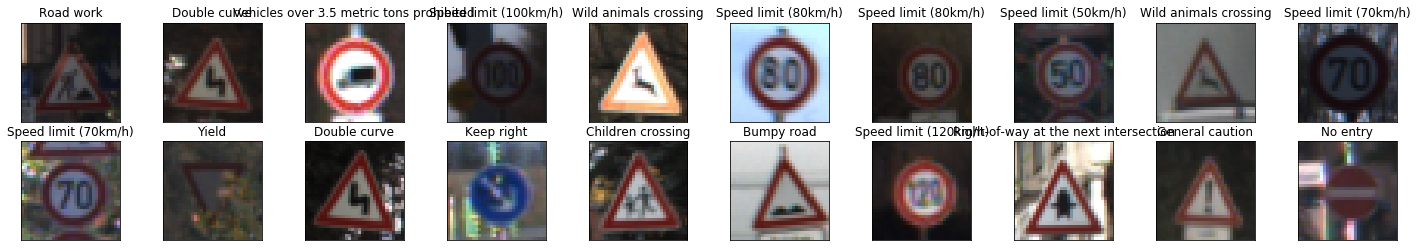

In [35]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display
print(int(labels[0]))
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(id_label[int(labels[idx])])